In [2]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

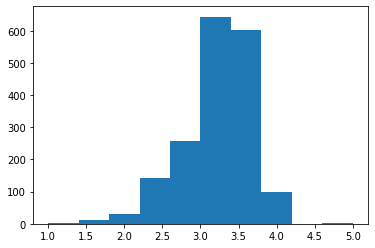

In [3]:
url ='https://content.codecademy.com/courses/beautifulsoup/cacao/index.html'

html = requests.get(url)
soup = BeautifulSoup(html.content,'html.parser')

#抓取Ratings
ratings_table = soup.find_all('td', attrs = {'class':'Rating'})

ratings = []

for rating in ratings_table[1:]:
  rate = float(rating.get_text())
  ratings.append(rate)

plt.hist(ratings)
plt.show()

In [4]:
company_table = soup.find_all('td',attrs = {'class':'Company'})

company = []

#抓取company
for com in company_table[1:]:
  company_name = com.get_text()
  company.append(company_name)

#建立欄位為company、ratings的表格
cocoa_table = {'Company': company, 'Ratings': ratings}
cocoa_table_df = pd.DataFrame.from_dict(cocoa_table)


#整理成平均rating前10高的公司
mean_value = cocoa_table_df.groupby('Company').Ratings.mean()
ten_best = mean_value.nlargest(10)
print(ten_best)

Company
Tobago Estate (Pralus)                  4.000000
Heirloom Cacao Preservation (Zokoko)    3.875000
Ocelot                                  3.875000
Amedei                                  3.846154
Matale                                  3.812500
Patric                                  3.791667
Idilio (Felchlin)                       3.775000
Acalli                                  3.750000
Chocola'te                              3.750000
Christopher Morel (Felchlin)            3.750000
Name: Ratings, dtype: float64


想要比較Rating較高是否和可可含量有關

[-0.01246131  4.07938814]


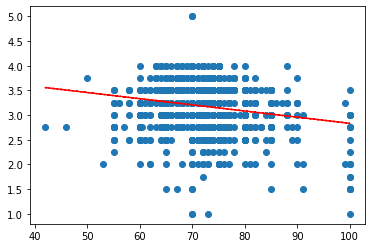

In [5]:
#抓取cocoa百分比的資料
cocoa = []
cocoa_table = soup.find_all('td',attrs={'class': 'CocoaPercent'})
for co in cocoa_table[1:]:
  cocoapercent = co.get_text().strip('%')
  cocoa.append(float(cocoapercent))

cocoa_table_df['CocoaPercentage'] = cocoa
#print(cocoa_table_df)

# 繪制散布圖
plt.scatter(cocoa_table_df.CocoaPercentage, cocoa_table_df.Ratings)

#凝合出一次函數的係數
z = np.polyfit(cocoa_table_df.CocoaPercentage, cocoa_table_df.Ratings, 1)
print(z)

#繪出以z為參數的一次函數圖形
line_function = np.poly1d(z)
plt.plot(cocoa_table_df.CocoaPercentage, line_function(cocoa_table_df.CocoaPercentage), "r--")

plt.show()
